<a href="https://colab.research.google.com/github/DongWooLeee/Tobigs19/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 10.7 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

In [4]:
samsung_df#322 rows

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


Train_test_split

<AxesSubplot:xlabel='day'>

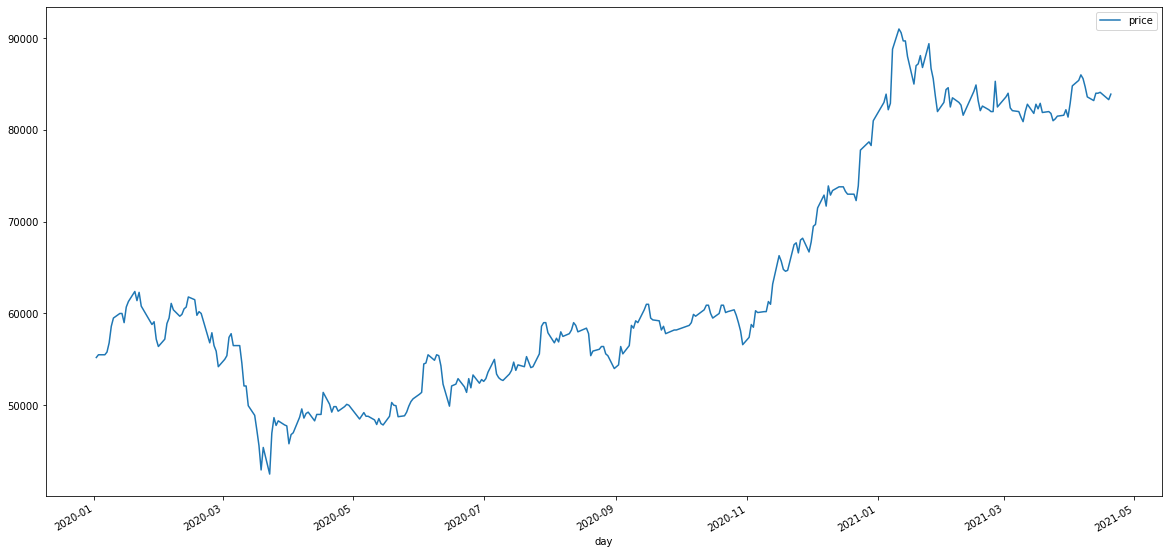

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

samsung_df.plot(ax=ax)

In [7]:
samsung_df[samsung_df['price']==42500.0]

,price
day,
2020-03-23,42500.0


In [8]:
import warnings

warnings.filterwarnings(action='ignore') 

Text(2020-01-01, 48000, 'LB \n-Date: 2020-03-23 \n-Closing Price: 42,500')

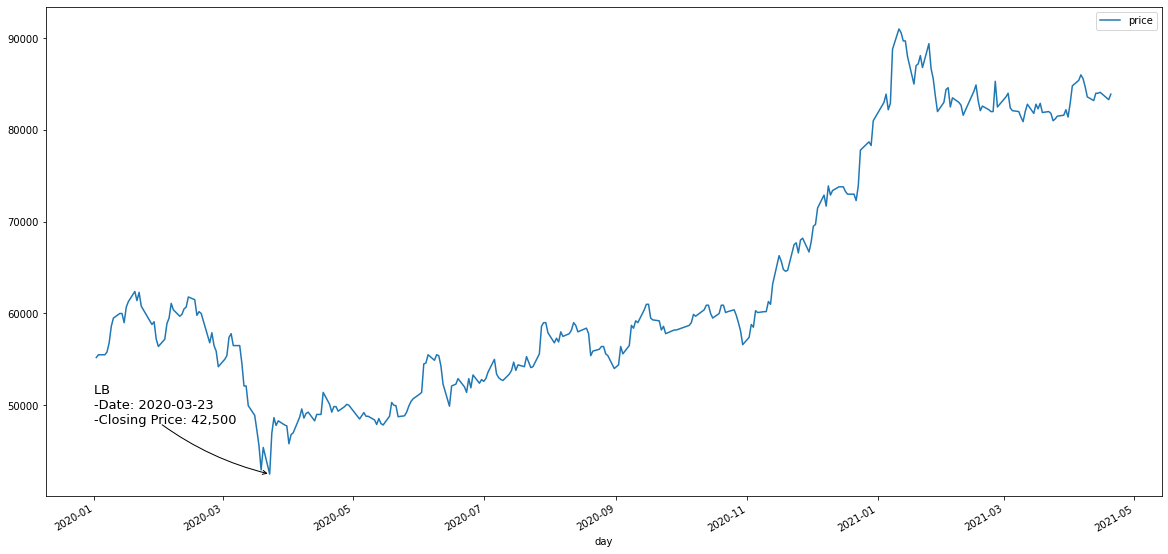

In [9]:
#나락 최대
fig, ax = plt.subplots(figsize=(20, 10))
samsung_df.plot(ax=ax)
ax.annotate('', xy=('2020-03-23' ,42500.0), xytext=('2020-02-01', 48000.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.1"),
           )
plt.text('2020-01-01',48000, "LB \n-Date: 2020-03-23 \n-Closing Price: 42,500",fontsize=13)


In [10]:
max(samsung_df.values)

array([91000.])

In [11]:
samsung_df[samsung_df['price']==91000.0]

,price
day,
2021-01-11,91000.0


Text(2021-01-20, 60000, 'HB \n-Date: 2021-02-11 \n-Closing Price: 91000 ')

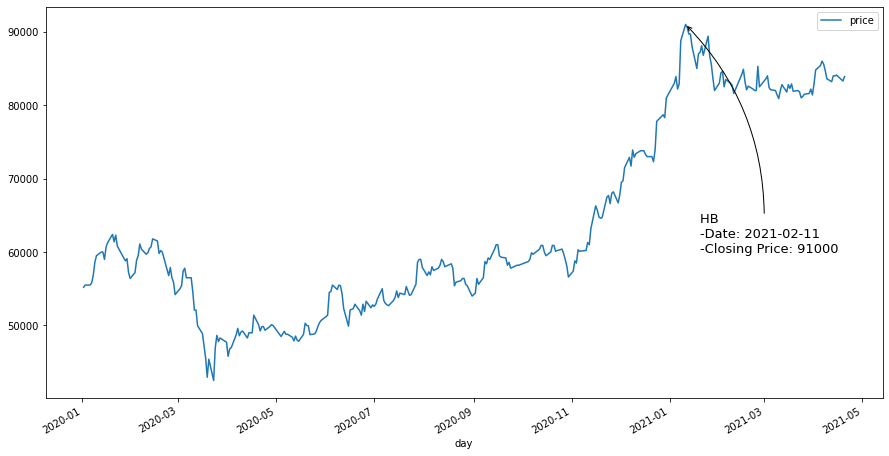

In [12]:
# 상한
fig, ax = plt.subplots(figsize=(15, 8))
samsung_df.plot(ax=ax)
ax.annotate('', xy=('2021-01-11' ,91000.0), xytext=('2021-03-01', 65000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2021-01-20',60000, "HB \n-Date: 2021-02-11 \n-Closing Price: 91000 ",fontsize=13)


Text(2021-01-20, 60000, 'HB \n-Date: 2021-02-11 \n-Closing Price: 91000 ')

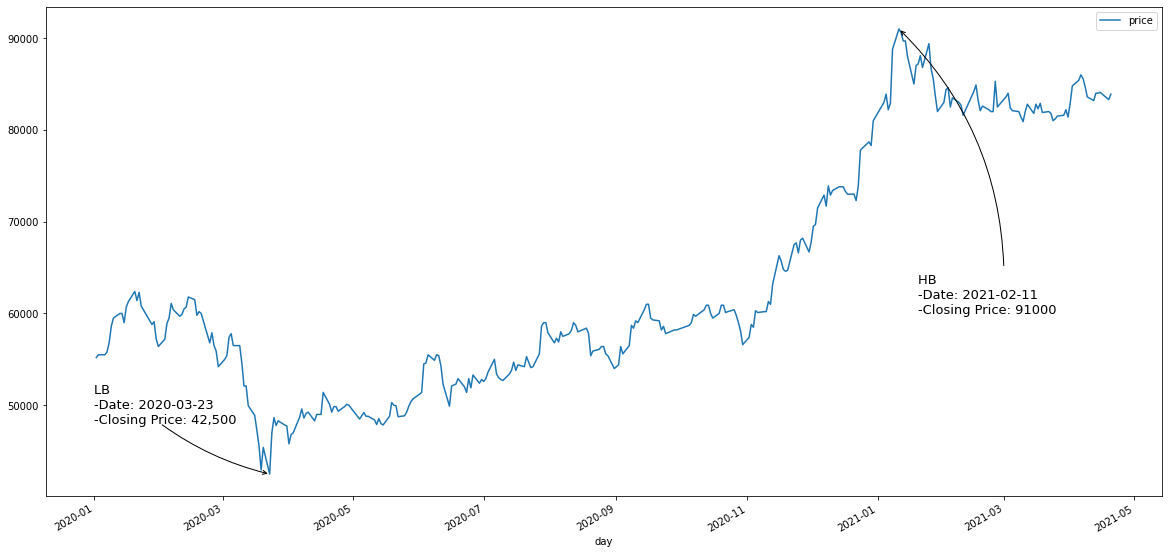

In [13]:
#전체 plot
fig, ax = plt.subplots(figsize=(20, 10))
samsung_df.plot(ax=ax)
ax.annotate('', xy=('2020-03-23' ,42500.0), xytext=('2020-02-01', 48000.0),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.1"),
           )
plt.text('2020-01-01',48000, "LB \n-Date: 2020-03-23 \n-Closing Price: 42,500",fontsize=13)

ax.annotate('', xy=('2021-01-11' ,91000.0), xytext=('2021-03-01', 65000),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2"),
           )

plt.text('2021-01-20',60000, "HB \n-Date: 2021-02-11 \n-Closing Price: 91000 ",fontsize=13)

삼성전자 주가는 ascending trend를 큰 범위에서는 가지고 있다. 따라서, 시간에 대해 평균과 분산이 증가할 것임을 짐작할 수 있으며, non-stationary한 시계열이다.

만약 삼성전자 주가의 평균이 시간에 대해 일정하다면(정상 시계열) 표본에서 구한 평균이 내일의 주가 평균을 구하는데 유의미한 정보로 활용이 가능하다. 하지만, 현재 삼성전자 주가는 비정상시계열의 형태를 띄고 있으므로, 이는 활용될 수 없다.

## ARIMA

In [43]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import itertools
import warnings
warnings.filterwarnings('ignore')
import os


In [45]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

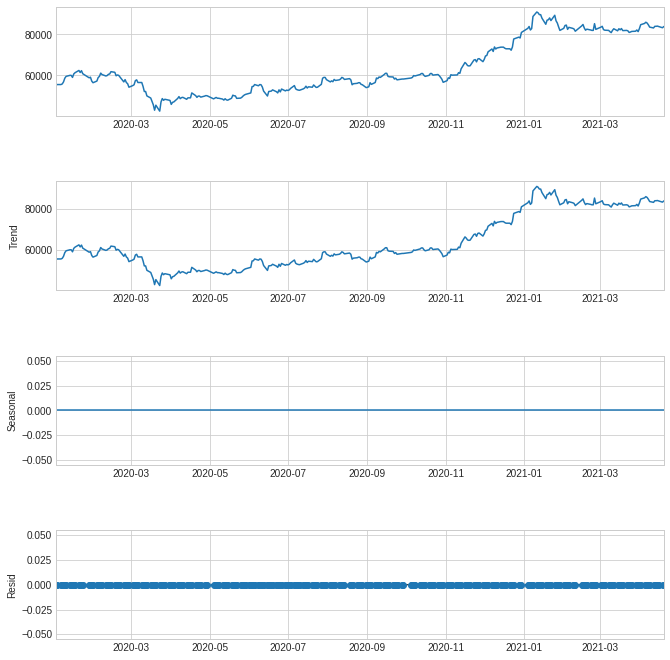

In [51]:
from statsmodels.graphics.tsaplots import plot_predict
decomposition = sm.tsa.seasonal_decompose(samsung_df, model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

시계열 데이터의 예측을 위해서는 데이터가 stationary인지, non-stationary인지 확인하는 절차를 거쳐야 한다.

따라서 ACF, PACF 플롯을 시각화하여 stationary 여부를 확인하고, non-stationary 일 경우 차분(difference)을 진행한다.

In [53]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(samsung_df, test_size=0.2, shuffle=False)


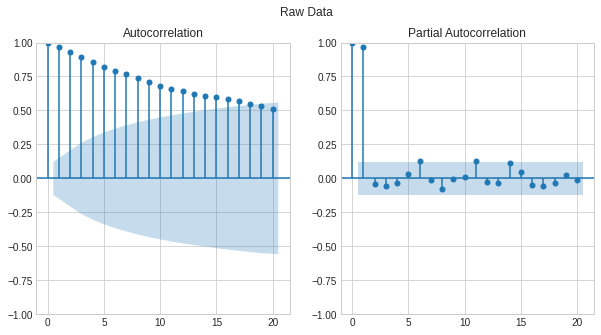

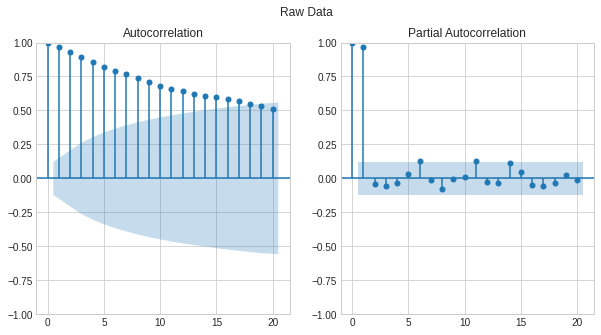

In [59]:
# ACF, PACF plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=20, ax=ax[1])

In [63]:
train_data

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-01-08,88800.0
2021-01-11,91000.0
2021-01-12,90600.0


In [68]:
train_data['price']
print('Raw data')
print(train_data.head())
print('Differenced data')
print(diff_train_data.head())

day
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-06    55500.0
2020-01-07    55800.0
2020-01-08    56800.0
               ...   
2021-01-08    88800.0
2021-01-11    91000.0
2021-01-12    90600.0
2021-01-13    89700.0
2021-01-14    89700.0
Name: price, Length: 257, dtype: float64

plot을 확인한 결과, ACF이 천천히 감소하는 패턴 -> non-stationary 이므로 차분을 진행한다.



In [73]:
# Non-stationary -> stationary 보정 (차분, difference)
# differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['price'].diff() # 차분
diff_train_data = diff_train_data.dropna() # 차분 후 생기는 결측치 제거

# 차분 후 생기는 결측치 제거
diff_train_data

day
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
2020-01-09    1800.0
               ...  
2021-01-08    5900.0
2021-01-11    2200.0
2021-01-12    -400.0
2021-01-13    -900.0
2021-01-14       0.0
Name: price, Length: 256, dtype: float64

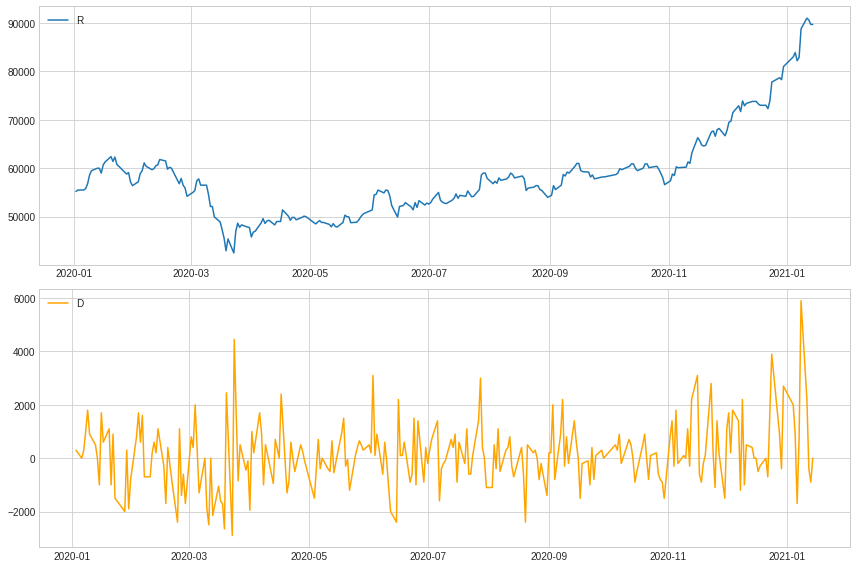

In [75]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(train_data['price'])
ax1.legend('Raw data (Non-stationary)')

ax2.plot(diff_train_data, color='orange' )
ax2.legend('Differenced data (stationary)')


plt.tight_layout()
plt.show()

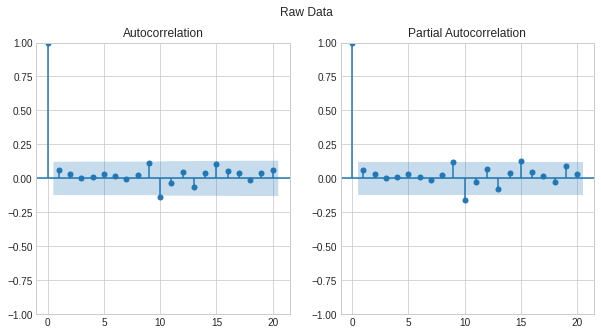

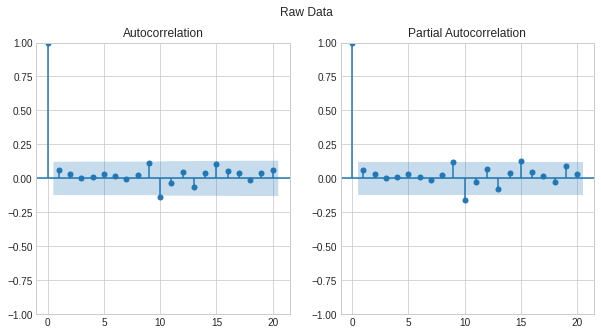

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=20, ax=ax[1])

In [81]:
from statsmodels.tsa.arima.model import ARIMA

p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(train_data['price'].values, order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))

ARIMA pdq : (0, 1, 0) >> AIC : 4365.03
ARIMA pdq : (0, 1, 1) >> AIC : 4366.44
ARIMA pdq : (0, 2, 0) >> AIC : 4507.08
ARIMA pdq : (0, 2, 1) >> AIC : 4477.9
ARIMA pdq : (1, 1, 0) >> AIC : 4366.41
ARIMA pdq : (1, 1, 1) >> AIC : 4365.97
ARIMA pdq : (1, 2, 0) >> AIC : 4489.37
ARIMA pdq : (1, 2, 1) >> AIC : 4454.09


Choose the least AIC: (p,d,q) = (0,1,0)...?
거의 차이 안나므로 그냥 (1,1,1)로 시도


In [82]:
model = ARIMA(train_data['price'].values, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2179.987
Date:                Tue, 14 Mar 2023   AIC                           4365.974
Time:                        11:06:49   BIC                           4376.610
Sample:                             0   HQIC                          4370.252
                                - 257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9025      0.135      6.678      0.000       0.638       1.167
ma.L1         -0.8804      0.154     -5.728      0.000      -1.182      -0.579
sigma2      1.485e+06   9.08e+04     16.359      0.000    1.31e+06    1.66e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                77.99
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.74
Prob(H) (two-sided):                  0.95   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
from sklearn.metrics import r2_score

pred = model_fit.forecast(len(test_data))
pred_lb = min(pred)
pred_ub = max(pred)

pred_index = list(test_data.index)
r2 = r2_score(test_data['price'].values, pred)




In [92]:
test_data

,price
day,
2021-01-15,88000.0
2021-01-18,85000.0
2021-01-19,87000.0
2021-01-20,87200.0
2021-01-21,88100.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


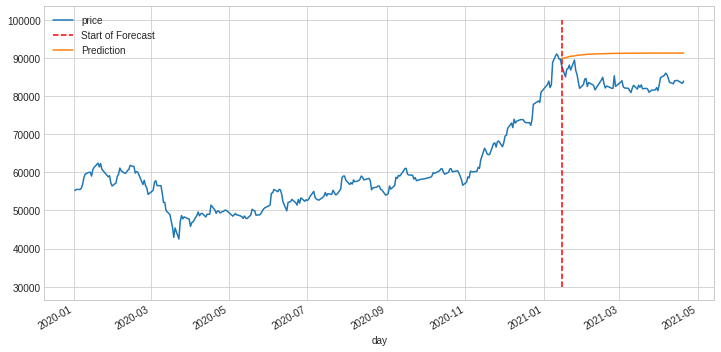

In [94]:
fig, ax = plt.subplots(figsize=(12, 6))
samsung_df['price'].plot(ax =ax)
ax.vlines('2021-01-15	', 30000, 100000, linestyle='--',color='r', label='Start of Forecast')
ax.plot(pred_index, pred, label='Prediction')
ax.legend(loc='upper left')
plt.show()

In [91]:
print(r2)
#그리 좋지 않다.


-15.905502647523605


## Prophet

https://peerj.com/preprints/3190/

dataframe feature into 'ds','y'

Prophet 클래스 선언 후, fit()

sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터

changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.


In [ ]:
samsung_df = samsung_df.reset_index()

samsung_df.columns = ['ds', 'y']

samsung_train_df = samsung_df[:317]
samsung_test_df = samsung_df[317:]

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(samsung_train_df)


In [ ]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

In [ ]:
fig1 = prophet.plot(forecast_data)


In [ ]:
fig2 = prophet.plot_components(forecast_data)


In [ ]:
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = samsung_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")